In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
behav_loading = pd.read_csv('data/python_entropy_analysis/behavior_loading.csv', sep=',')
dis_loading = pd.read_csv('data/python_entropy_analysis/disease_loading.csv',sep=',')

# set thresholding percentile
thr_percentile = 75

0.028126834799999997 is 70th percentile
0.032829065 is 75th percentile
0.03922619500000002 is 80th percentile


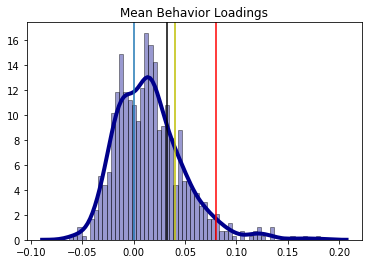

In [3]:
pos_behav_loading = np.zeros((len(behav_loading),len(behav_loading.columns)-2))
# put values in numpy array
column_val = 0
for j in behav_loading.columns[2:len(behav_loading.columns)]:
    for i in range(0,len(behav_loading)):
        pos_behav_loading[i,column_val] = behav_loading.iloc[i][j]
    column_val = column_val + 1
    
# percentile
print(str(np.percentile(pos_behav_loading,70)) + " is 70th percentile")
print(str(np.percentile(pos_behav_loading,75)) + " is 75th percentile")
print(str(np.percentile(pos_behav_loading,80)) + " is 80th percentile")

# density plot
ax = sns.distplot(pos_behav_loading.flatten(), 
             hist=True, 
             bins=60,
             kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(0, 0, 1)
#plt.text(0,15,'0',rotation=90)
plt.axvline(0.020*2,0,1, color='y') # median absolute deviation (about zero) of 2
#plt.text(0.020*2,13,'scaling=2',rotation=90)
plt.axvline(0.020*4,0,1, color='r') # median absolute deviation (about zero) of 4
#plt.text(0.020*4,13,'scaling=4',rotation=90)
plt.axvline(0.03248,0,1, color = 'black')
#plt.text(0.03272-0.01,15,'75%',rotation=90)
plt.title("Mean Behavior Loadings")
plt.savefig('figures/sup_figure_2a.png')

thr = np.percentile(pos_behav_loading,thr_percentile)

Total Behavior Loadings: 728


/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply


,Comp_Behav,B.Entropy,Labels
0,IC-18,0.590925,Temporo-Limbic
1,IC-14,0.580823,Fronto-Striatal
2,IC-06,0.587647,Thal
3,IC-16,0.772106,Ventral Attention
4,IC-07,0.408427,Auditory
5,IC-20,0.271769,Medial Visual
6,IC-17,0.708375,Cognitive Control
7,IC-04,0.821062,Salience
8,IC-09,0.667116,R. Cent. Executive
9,IC-13,0.436895,DMN


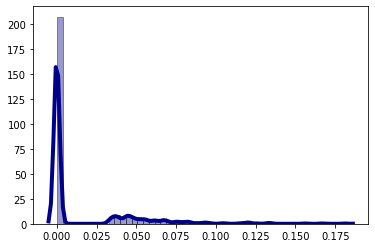

In [4]:
pos_behav_loading = np.zeros((len(behav_loading),len(behav_loading.columns)-2))
# put values in numpy array
column_val = 0
for j in behav_loading.columns[2:len(behav_loading.columns)]:
    for i in range(0,len(behav_loading)):
        if behav_loading.iloc[i][j] > thr:
            pos_behav_loading[i,column_val] = behav_loading.iloc[i][j]
        else: 
            pos_behav_loading[i,column_val] = 0
    column_val = column_val + 1

print("Total Behavior Loadings: " + str(len(pos_behav_loading)*len(pos_behav_loading[0])))

# density plot
sns.distplot(pos_behav_loading.flatten(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

column_sums = []
for j in range(0,pos_behav_loading.shape[1]):
        column_sums.append(np.sum(pos_behav_loading[:,j]))

# calculate probability as percentage
percentage_behav =  np.zeros((len(behav_loading),len(behav_loading.columns)-2))
for j in range(0,pos_behav_loading.shape[1]):
    for i in range(0,len(behav_loading)):
            percentage_behav[i,j] = pos_behav_loading[i][j]/column_sums[j]
    column_val = column_val + 1

# calculate entropy
p_ln_p =  -percentage_behav*np.log(percentage_behav)
behav_entropy = []
for j in range(0,pos_behav_loading.shape[1]):
        behav_entropy.append(np.nansum(p_ln_p[:,j]))
        
max_behav_entropy = behav_entropy/np.log(len(behav_loading))

d = {'Comp_Behav': behav_loading.columns[2:len(behav_loading.columns)], 
     'B.Entropy': max_behav_entropy}
df = pd.DataFrame(data=d)

# add labels
df.insert(2, "Labels", ["Temporo-Limbic",
                            "Fronto-Striatal", "Thal",
                            "Ventral Attention","Auditory",
                            "Medial Visual", "Cognitive Control",
                            "Salience","R. Cent. Executive",
                            "DMN", "L. Cent. Executive", 
                            "Hand Sensorimotor", 
                            "Mouth Sensorimotor"], True) 
  
df

(56,)
['Action.Execution.Other' 'Action.Execution.Speech' 'Action.Imagination'
 'Action.Inhibition' 'Action.Motor Learning' 'Action.Observation'
 'Action.Preparation' 'Action.Rest' 'Cognition.Attention'
 'Cognition.Language.Orthography' 'Cognition.Language.Other'
 'Cognition.Language.Semantics' 'Cognition.Language.Speech'
 'Cognition.Language.Syntax' 'Cognition.Memory.Explicit'
 'Cognition.Memory.Implicit' 'Cognition.Memory.Other'
 'Cognition.Memory.Working' 'Cognition.Music' 'Cognition.Reasoning'
 'Cognition.Social Cognition' 'Cognition.Somatic' 'Cognition.Spatial'
 'Cognition.Temporal' 'Emotion.Intensity' 'Emotion.Negative.Anger'
 'Emotion.Negative.Anxiety' 'Emotion.Negative.Disgust'
 'Emotion.Negative.Embarrassment' 'Emotion.Negative.Fear'
 'Emotion.Negative.Other' 'Emotion.Negative.Punishment/Loss'
 'Emotion.Negative.Sadness' 'Emotion.Neutral' 'Emotion.Other'
 'Emotion.Positive.Happiness.Other' 'Emotion.Positive.Other'
 'Emotion.Positive.Reward/Gain' 'Emotion.Valence'
 'Interocepti

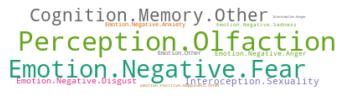

IC-14


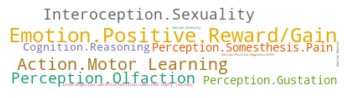

IC-06


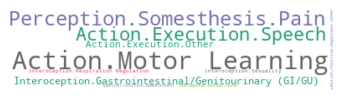

IC-16


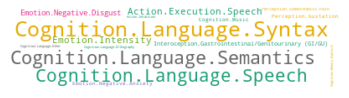

IC-07


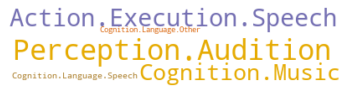

IC-20


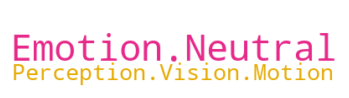

IC-17


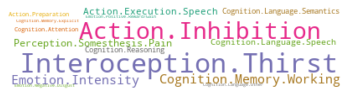

IC-04


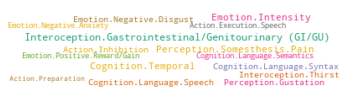

IC-09


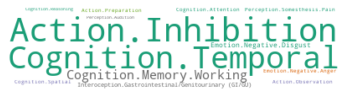

IC-13


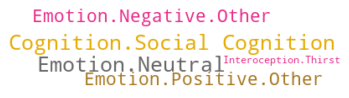

IC-03


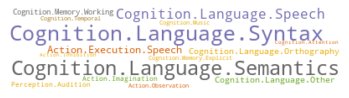

IC-08


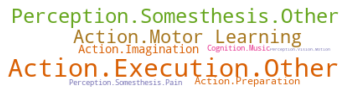

IC-12


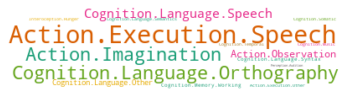

In [5]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

print(pos_behav_loading[:,1].shape)
print(behav_loading["BrainMap Behavior"].values)

lis = {}
for network in range(0,len(pos_behav_loading[0])):
    print(behav_loading.columns[network+2])
    for x in range(0,len(pos_behav_loading[:,network])):
        if behav_loading["Experiments"][x] > 15:
            lis.update({behav_loading["BrainMap Behavior"][x]:int(pos_behav_loading[x,network]*100)})

    wordcloud = WordCloud(max_font_size=60, 
                          max_words=15, 
                          width=400,
                          height=100,
                          background_color="white",
                          colormap='Dark2').generate_from_frequencies(lis)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

0.017193245600000004 is 70th percentile
0.02184734025 is 75th percentile
0.0283296152 is 80th percentile


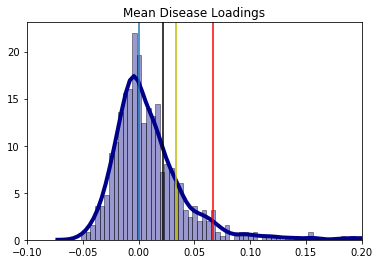

In [6]:
pos_dis_loading = np.zeros((len(dis_loading),len(dis_loading.columns)-2))

column_val = 0
for j in dis_loading.columns[2:len(dis_loading.columns)]:
    for i in range(0,len(dis_loading)):
        pos_dis_loading[i,column_val] = dis_loading.iloc[i][j]
    column_val = column_val + 1

# percentile
print(str(np.percentile(pos_dis_loading,70)) + " is 70th percentile")
print(str(np.percentile(pos_dis_loading,75)) + " is 75th percentile")
print(str(np.percentile(pos_dis_loading,80)) + " is 80th percentile")

# density plot
ax = sns.distplot(pos_dis_loading.flatten(), 
             hist=True, 
             bins=100,
             kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlim(-0.10, 0.20)

plt.axvline(0, 0, 1)
plt.axvline(0.0167*2,0,1, color='y') # median absolute deviation (about zero) of 2
plt.axvline(0.0167*4,0,1, color='r') # median absolute deviation (about zero) of 4
plt.axvline(0.0218,0,1, color = 'black')
plt.title("Mean Disease Loadings")
plt.savefig('figures/sup_figure_2b.png')

# set density matrix threshold
thr = np.percentile(pos_dis_loading,thr_percentile)

Total Disease Loadings: 602


/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply


,Comp_Dis,A.Entropy,Labels
0,IC-01,0.745168,Temporo-Limbic
1,IC-02,0.611256,Fronto-Striatal
2,IC-05,0.586979,Pulvinar (Thal.)
3,IC-15,0.679770,MDN (Thal.)
4,IC-03,0.703648,Ventral Attention
5,IC-11,0.538659,Auditory
6,IC-20,0.000000,Medial Visual
7,IC-09,0.535718,Cognitive Control
8,IC-12,0.767408,Salience
9,IC-07,0.465676,R. Cent. Executive


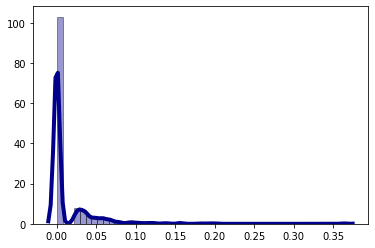

In [7]:
pos_dis_loading = np.zeros((len(dis_loading),len(dis_loading.columns)-2))

# zero negative values
column_val = 0
for j in dis_loading.columns[2:len(dis_loading.columns)]:
    for i in range(0,len(dis_loading)):
        if dis_loading.iloc[i][j] > thr:
            pos_dis_loading[i,column_val] = dis_loading.iloc[i][j]
        else: 
            pos_dis_loading[i,column_val] = 0
    column_val = column_val + 1

print("Total Disease Loadings: " + str(len(pos_dis_loading)*len(pos_dis_loading[0])))
    
# density plot
sns.distplot(pos_dis_loading.flatten(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

column_sums = []
for j in range(0,pos_dis_loading.shape[1]):
        column_sums.append(np.sum(pos_dis_loading[:,j]))
    
# calculate probability as percentage
percentage_dis =  np.zeros((len(dis_loading),len(dis_loading.columns)-2))
for j in range(0,pos_dis_loading.shape[1]):
    for i in range(0,len(dis_loading)):
            percentage_dis[i,j] = pos_dis_loading[i][j]/column_sums[j]
    column_val = column_val + 1

# calculate entropy
p_ln_p =  -percentage_dis*np.log(percentage_dis)
dis_entropy = []
for j in range(0,pos_dis_loading.shape[1]):
        dis_entropy.append(np.nansum(p_ln_p[:,j]))
        
max_dis_entropy = dis_entropy/np.log(len(dis_loading))

d = {'Comp_Dis': dis_loading.columns[2:len(dis_loading.columns)], 
     'A.Entropy': max_dis_entropy}
df_dis = pd.DataFrame(data=d)

# add labels
df_dis.insert(2, "Labels", ["Temporo-Limbic",
                           "Fronto-Striatal",
                           "Pulvinar (Thal.)",
                           "MDN (Thal.)",
                           "Ventral Attention",
                           "Auditory",
                           "Medial Visual",
                           "Cognitive Control",
                           "Salience",
                           "R. Cent. Executive", 
                           "Anterior DMN", 
                           "Posterior DMN",
                           "L. Cent. Executive", 
                           "Sensorimotor"])

df_dis

(56,)
['Action.Execution.Other' 'Action.Execution.Speech' 'Action.Imagination'
 'Action.Inhibition' 'Action.Motor Learning' 'Action.Observation'
 'Action.Preparation' 'Action.Rest' 'Cognition.Attention'
 'Cognition.Language.Orthography' 'Cognition.Language.Other'
 'Cognition.Language.Semantics' 'Cognition.Language.Speech'
 'Cognition.Language.Syntax' 'Cognition.Memory.Explicit'
 'Cognition.Memory.Implicit' 'Cognition.Memory.Other'
 'Cognition.Memory.Working' 'Cognition.Music' 'Cognition.Reasoning'
 'Cognition.Social Cognition' 'Cognition.Somatic' 'Cognition.Spatial'
 'Cognition.Temporal' 'Emotion.Intensity' 'Emotion.Negative.Anger'
 'Emotion.Negative.Anxiety' 'Emotion.Negative.Disgust'
 'Emotion.Negative.Embarrassment' 'Emotion.Negative.Fear'
 'Emotion.Negative.Other' 'Emotion.Negative.Punishment/Loss'
 'Emotion.Negative.Sadness' 'Emotion.Neutral' 'Emotion.Other'
 'Emotion.Positive.Happiness.Other' 'Emotion.Positive.Other'
 'Emotion.Positive.Reward/Gain' 'Emotion.Valence'
 'Interocepti

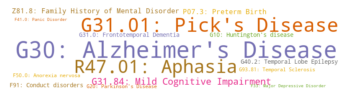

IC-02


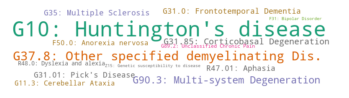

IC-05


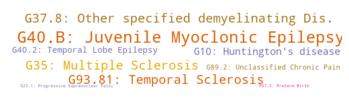

IC-15


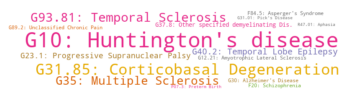

IC-03


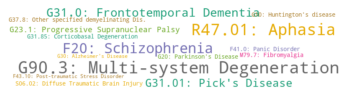

IC-11


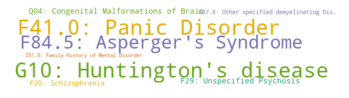

IC-20
IC-09


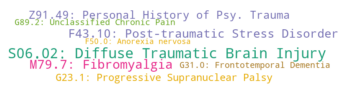

IC-12


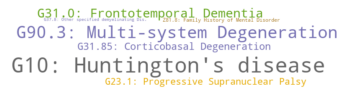

IC-07


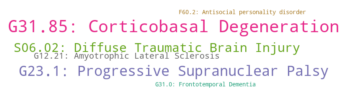

IC-14


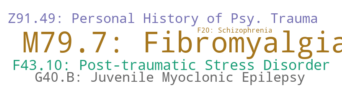

IC-18


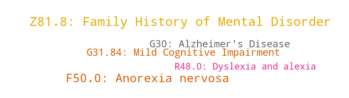

IC-16


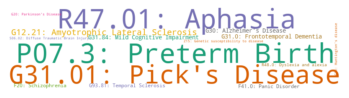

IC-10


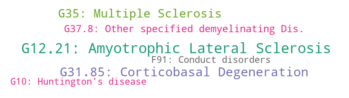

In [20]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

print(pos_behav_loading[:,1].shape)
print(behav_loading["BrainMap Behavior"].values)

pos_dis_loading = np.zeros((len(dis_loading),len(dis_loading.columns)-2))

# zero negative values
column_val = 0
for j in dis_loading.columns[2:len(dis_loading.columns)]:
    for i in range(0,len(dis_loading)):
        if dis_loading.iloc[i][j] > thr:
            pos_dis_loading[i,column_val] = dis_loading.iloc[i][j]
        else: 
            pos_dis_loading[i,column_val] = 0
    column_val = column_val + 1

lis = {}
for network in range(0,len(pos_dis_loading[0])):
    print(dis_loading.columns[network+2])
    for x in range(0,len(pos_dis_loading[:,network])):
        if dis_loading["Experiments"][x] > 10:
            lis.update({dis_loading["ICD-10 Diagnosis"][x]:int(pos_dis_loading[x,network]*500)})

    if dis_loading.columns[network+2] != "IC-20":
        wordcloud = WordCloud(max_font_size=70, 
                              min_font_size=4,
                              max_words=15, 
                              width=400,
                              height=100,
                              background_color="white",
                              scale=2,
                              colormap='Dark2').generate_from_frequencies(lis)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

In [8]:
# merge dis and behav matrices
result = pd.merge(df_dis, df, on='Labels')
result

,Comp_Dis,A.Entropy,Labels,Comp_Behav,B.Entropy
0,IC-01,0.745168,Temporo-Limbic,IC-18,0.590925
1,IC-02,0.611256,Fronto-Striatal,IC-14,0.580823
2,IC-03,0.703648,Ventral Attention,IC-16,0.772106
3,IC-11,0.538659,Auditory,IC-07,0.408427
4,IC-20,0.000000,Medial Visual,IC-20,0.271769
5,IC-09,0.535718,Cognitive Control,IC-17,0.708375
6,IC-12,0.767408,Salience,IC-04,0.821062
7,IC-07,0.465676,R. Cent. Executive,IC-09,0.667116
8,IC-16,0.711775,L. Cent. Executive,IC-03,0.716580


In [9]:
# add other matched networks (that were split) manually
result = result.append({'Labels' : "Pulvinar (Thal.)",
                       'Comp_Dis': df_dis["Comp_Dis"][2],
                       'A.Entropy': df_dis["A.Entropy"][2],
                       'Comp_Behav': df["Comp_Behav"][2],
                       'B.Entropy': df["B.Entropy"][2]}, ignore_index=True)

result = result.append({'Labels' : "MDN (Thal.)",
                       'Comp_Dis': df_dis["Comp_Dis"][3],
                       'A.Entropy': df_dis["A.Entropy"][3],
                       'Comp_Behav': df["Comp_Behav"][2],
                       'B.Entropy': df["B.Entropy"][2]}, ignore_index=True)

result = result.append({'Labels' : "Anterior DMN",
                       'Comp_Dis': df_dis["Comp_Dis"][10],
                       'A.Entropy': df_dis["A.Entropy"][10],
                       'Comp_Behav': df["Comp_Behav"][9],
                       'B.Entropy': df["B.Entropy"][9]}, ignore_index=True)

result = result.append({'Labels' : "Posterior DMN",
                       'Comp_Dis': df_dis["Comp_Dis"][11],
                       'A.Entropy': df_dis["A.Entropy"][11],
                       'Comp_Behav': df["Comp_Behav"][9],
                       'B.Entropy': df["B.Entropy"][9]}, ignore_index=True)

result = result.append({'Labels' : "Hand Sensorimotor",
                       'Comp_Dis': df_dis["Comp_Dis"][13],
                       'A.Entropy': df_dis["A.Entropy"][13],
                       'Comp_Behav': df["Comp_Behav"][11],
                       'B.Entropy': df["B.Entropy"][11]}, ignore_index=True)

result = result.append({'Labels' : "Mouth Sensorimotor",
                       'Comp_Dis': df_dis["Comp_Dis"][13],
                       'A.Entropy': df_dis["A.Entropy"][13],
                       'Comp_Behav': df["Comp_Behav"][12],
                       'B.Entropy': df["B.Entropy"][12]}, ignore_index=True)

In [10]:
result

,Comp_Dis,A.Entropy,Labels,Comp_Behav,B.Entropy
0,IC-01,0.745168,Temporo-Limbic,IC-18,0.590925
1,IC-02,0.611256,Fronto-Striatal,IC-14,0.580823
2,IC-03,0.703648,Ventral Attention,IC-16,0.772106
3,IC-11,0.538659,Auditory,IC-07,0.408427
4,IC-20,0.000000,Medial Visual,IC-20,0.271769
5,IC-09,0.535718,Cognitive Control,IC-17,0.708375
6,IC-12,0.767408,Salience,IC-04,0.821062
7,IC-07,0.465676,R. Cent. Executive,IC-09,0.667116
8,IC-16,0.711775,L. Cent. Executive,IC-03,0.716580
9,IC-05,0.586979,Pulvinar (Thal.),IC-06,0.587647


In [11]:
# add corrleations to matrix

import pickle
cor_mat = pd.read_pickle("data/cor_mat.pkl")
cor_mat['VBM-01']['FUNC-18']
result["r"] = np.nan

for iter_match in range(0,len(result)):
    result.loc[iter_match,"r"] = cor_mat[('VBM-' + result.loc[iter_match]["Comp_Dis"][3:5])][('FUNC-' + result.loc[iter_match]["Comp_Behav"][3:5])]
result

,Comp_Dis,A.Entropy,Labels,Comp_Behav,B.Entropy,r
0,IC-01,0.745168,Temporo-Limbic,IC-18,0.590925,0.615340
1,IC-02,0.611256,Fronto-Striatal,IC-14,0.580823,0.615189
2,IC-03,0.703648,Ventral Attention,IC-16,0.772106,0.523496
3,IC-11,0.538659,Auditory,IC-07,0.408427,0.515131
4,IC-20,0.000000,Medial Visual,IC-20,0.271769,0.481923
5,IC-09,0.535718,Cognitive Control,IC-17,0.708375,0.416162
6,IC-12,0.767408,Salience,IC-04,0.821062,0.431350
7,IC-07,0.465676,R. Cent. Executive,IC-09,0.667116,0.388593
8,IC-16,0.711775,L. Cent. Executive,IC-03,0.716580,0.335983
9,IC-05,0.586979,Pulvinar (Thal.),IC-06,0.587647,0.544776


In [14]:
result.to_csv("data/python_entropy_analysis/entropy_correlation_data_" + str(thr_percentile) + "perc.csv")